In [ ]:
y = f(x)
y = x + 1
y ----> dependent variable
x ----> independent variable
Temp = f(humidity) #Simple linear regression
height = f(age)
price = f(nrooms, area, location) #Multiple linear regression


In [1]:
import seaborn as sns
tip_df = sns.load_dataset('tips')
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

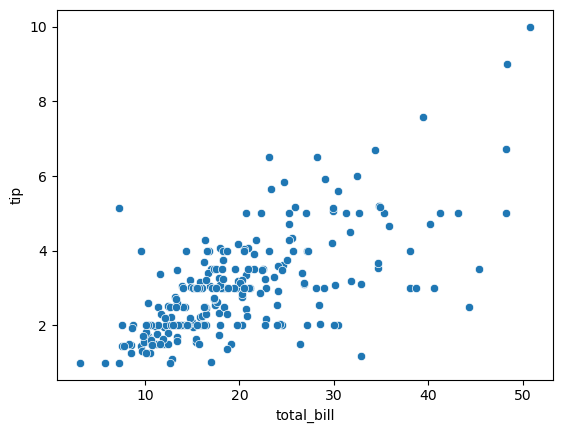

In [2]:
sns.scatterplot(x = 'total_bill', y = 'tip',
               data = tip_df)

<Axes: xlabel='total_bill', ylabel='tip'>

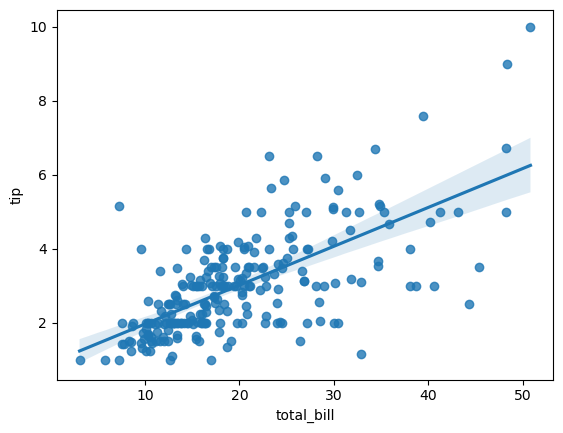

In [3]:
sns.regplot(x = 'total_bill', y = 'tip',
               data = tip_df)

In [4]:
#y = mx + c
y = 1.5*6 + 1.1
y

10.1

In [5]:
y = b0*x0 + b1*x1 + b2*x2 ......+ bn*xn + c + error 

SyntaxError: invalid syntax (1419333329.py, line 1)

In [6]:
import pandas as pd
energy_df = pd.read_csv(r"C:\Users\myang\Downloads\Foundation_2025-26\Foundation_2025-26\Unit 3 - Machine Learning\Classroom Hands-on\appliance_energy.csv")
energy_df.head()

,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201


In [7]:
#Rename the columns
energy_df.rename(columns = {"Temperature (°C)": 'temperature',
                           "Energy Consumption (kWh)": 'energy_consumption'},
                inplace = True)

In [8]:
energy_df.head(1)

,temperature,energy_consumption
0,22.490802,2.292604


In [9]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         100 non-null    float64
 1   energy_consumption  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [10]:
energy_df.isna().sum()

temperature           0
energy_consumption    0
dtype: int64

<Axes: xlabel='temperature', ylabel='energy_consumption'>

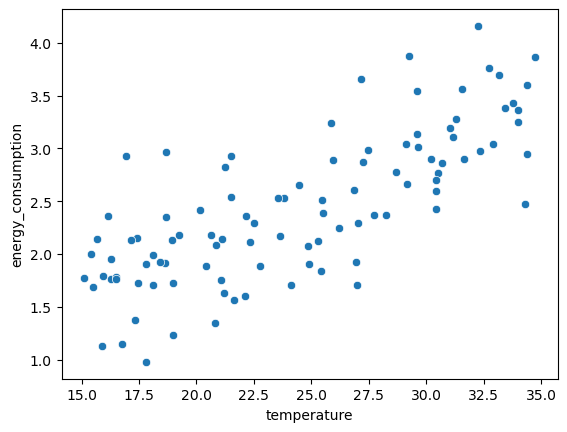

In [11]:
sns.scatterplot(x = 'temperature', y = 'energy_consumption', data = energy_df)

In [12]:
#identifying input and output features
X = energy_df[['temperature']]
y = energy_df['energy_consumption']

In [13]:
X[:5]

,temperature
0,22.490802
1,34.014286
2,29.639879
3,26.973170
4,18.120373


In [14]:
y[:5]

0    2.292604
1    3.251925
2    3.009868
3    1.703533
4    1.702201
Name: energy_consumption, dtype: float64

In [15]:
#split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 42)

In [16]:
X.shape

(100, 1)

In [17]:
X_train.shape

(80, 1)

In [18]:
y.shape

(100,)

In [19]:
y_train.shape

(80,)

In [20]:
X_train[:5]

,temperature
55,33.437485
88,32.744255
26,18.993476
42,15.687770
69,34.737739


In [21]:
#selecting the algorithm
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()
#Train the model
my_model.fit(X_train, y_train)

LinearRegression()

In [22]:
#Test the model
y_pred = my_model.predict(X_test)
y_pred[:5]

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ])

In [23]:
y_test[:5]

83    1.955394
53    3.037917
70    2.426014
45    2.370351
44    2.413076
Name: energy_consumption, dtype: float64

In [24]:
#Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error is: {mse:.2f}")
print(f"R2 Score is: {r2:.2f}")

Mean Squared Error is: 0.16
R2 Score is: 0.61


In [25]:
my_model.intercept_

0.22196391661907766

In [26]:
my_model.coef_

array([0.08996618])

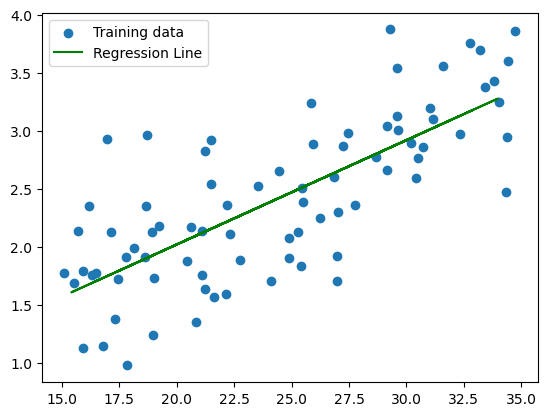

In [27]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, label = "Training data")
plt.plot(X_test, y_pred, label = "Regression Line", color = 'g')
plt.legend()
plt.show()